# **Python Assignment 1**
Math 313 Section 007 - Spring 2025

---
The main objects studied in Linear Algebra are vectors and matrices.


1.   Vectors are often referred to column vectors, written as

$$v = \begin{bmatrix}
v_1 \\ v_2 \\ \vdots \\ v_n
\end{bmatrix}$$

which can be viewed as a $1$ dimensional array;

2.   Matrices with $m$ rows, and $n$ columns, or in other words, matrices with size $m \times n$, expressed as

$$A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}$$

which can be viewed as a $2$ dimensional array.



## **Introductory Example**
Create vectors and matrices using Python and Numpy.

*   Lists are mutable sequence of objects, enclosed with [ and ];
*   np.array() can be used to convert a one dimensional list of data to an array.
*   Using nested brackets one can construct a two dimensional list (i.e., a list of lists), and again, np.array() will convert such list to a NumPy array.


Once the data is converted into array, we can

*   Access the components using indexing;
*   Split or slice the array;
*   Reshape the array;
*   Do algebra among arrays,
*   and so on.







In [82]:
# import numpy library
import numpy as np

In [83]:
# create a 1d list of numbers
L1 = [1, 2, 3, 4, 5, 6, 7];
print(L1)

# or use range() and convert to a list
L2 = list(range(1, 8));
print(L2)

# or use np.arange which be used for specified increment
L3 = np.arange(8);
print(L3)
L4 = np.arange(1, 8, 2);
print(L4)

# convert to an array
data = np.array(L1);
print(data)

# convert an array to list
print(data.tolist())

[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7]
[0 1 2 3 4 5 6 7]
[1 3 5 7]
[1 2 3 4 5 6 7]
[1, 2, 3, 4, 5, 6, 7]


In [84]:
# print the i-th element from the array using data[i - 1]
# where i-1 is the 0-offset index
print(data[5]) # print the 6th element

# negative indexing is allowed
print(data[-2]) # the 2nd last element (6-th)

# slicing
print(data[1:4]) # index 1 - 3, not including 4
print(data[:]) # all entries
print(data[-3:]) # last three

6
6
[2 3 4]
[1 2 3 4 5 6 7]
[5 6 7]


In [85]:
# create a 2d list of numbers
M1 = [[1, 2, 3],
      [2, 3, 4],
      [3, 4, 5],
      [4, 5, 6]];
print(M1)

# or
M2 = [];
for i in range(1, 5):
    M2.append(list(range(i, i + 3)))
M2 = np.array(M2);
print(M2)

# shape of array
print(M2.shape)
# more specifically
print(M2.shape[0]) # number of rows
print(M2.shape[1]) # number of columns
print(M2.size) # number of entries

[[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]
[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]
(4, 3)
4
3
12


In [86]:
# 2d indexing -- use comma to separate the index for each dimension
print(M2[1, 2]) # the (2,3)-entry
print(M2[1])  # the 2nd row
print(M2[:, -1])  # the last column

# slicing
X = M2[-2:, :2];
print(X) # last 2 rows and first 2 columns

# what do A and b represent?
A = M2[:, :-1];
b = M2[:, [-1]];  # 2-d array with a single column
print(A)
print(b)

4
[2 3 4]
[3 4 5 6]
[[3 4]
 [4 5]]
[[1 2]
 [2 3]
 [3 4]
 [4 5]]
[[3]
 [4]
 [5]
 [6]]


### **Transpose a matrix**

Given an $m \times n$ matrix

$$A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}$$

its transpose, denoted by $A^T$, is an $n \times m$ matrix given by

$$A^T = \begin{bmatrix}
a_{11} & a_{21} & \cdots & a_{m1} \\
a_{12} & a_{22} & \cdots & a_{m2} \\
\vdots & \vdots & \ddots & \vdots \\
a_{1n} & a_{2n} & \cdots & a_{mn}
\end{bmatrix}$$

In [87]:
# transpose of a 2d array
M2 = np.array([range(i, i + 3) for i in range(1, 5)]) # creat an array using list comprehension syntax
print(M2)
print(M2.T) # transpose

# flatten from 2d to 1d
M2 = M2.ravel()
print(M2)

# reshape from 1d to 2d
M2 = M2.reshape((2, 6))
print(M2) # reshape to a (2, 6)-array

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]
[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[1 2 3 2 3 4 3 4 5 4 5 6]
[[1 2 3 2 3 4]
 [3 4 5 4 5 6]]


## **Vectors and Matrices Arithmetics**

For now, we mainly consider the following operators between vectors:

*   Vectors addition (and subtraction);
*   Scalar multiplication;
*   Componentwise multiplication, inner product.

We consider the following operations between matrices:

*   Matrices addition (and subtraction);
*   Scalar multiplication;
*   Matrix multiplied by a vector;
*   Matrix multiplied by a matrix;
*   Transpose (mentioned above);
*   Inverse.

In [88]:
# define two vectors with equal length
v = np.array([1, 2, 3, 4, 5]);
print(v)
w = np.array([3, 4, 5, 6, 7]);
print(w)

# define a scalar
c = -3;

# add vectors
u1 = v + w;
print(u1)

# subtract vectors
u2 = v - w;
print(u2)

# scalar multiplication of given vector
u3 = c * v;
print(u3)

# componentwisely multiply vectors
u4 = v * w;
print(u4)

# inner product (or dot product) of vectors
u5 = v.dot(w);
print(u5)

[1 2 3 4 5]
[3 4 5 6 7]
[ 4  6  8 10 12]
[-2 -2 -2 -2 -2]
[ -3  -6  -9 -12 -15]
[ 3  8 15 24 35]
85


In [89]:
# define two matrices of the same size
A = np.array([[1, 2, 3],
              [4, 5, 6]]);
print(A)

B = np.array([[2, 3, 4],
              [3, 4, 5]]);
print(B)

# define a square matrix
C = np.array([[2, 4, 5],
              [4, 8, 10],
              [7, 1, 8]]); # not invertible

# extract diagonal vector of C and create a diagonal matrix
d = np.diag(C); # vector of length 3
D = np.diag(d); # invertible
print(D)

# define a scalar
k = -2;

# matrix addition
E1 = A + B;
print(E1)

# scalar multiplication
E2 = k * A;
print(E2)

# Hadamard product (componentwise multiplication)
E3 = A * B;
print(E3)

# matrix-vector multiplication
E4 = A.dot(d);
print(E4)

# matrix-matrix multiplication
E5 = A.dot(B.T);
print(E5)
# or
E6 = A @ B.T;
print(E6)
# the sizes matter
try:
    A.dot(B) # error will be raised on shapes of arrays not aligned
except Exception as e:
    print(e)  # print the error

# Inverse of an invertible matrix
D_inv = np.linalg.inv(D)
print(D_inv)

[[1 2 3]
 [4 5 6]]
[[2 3 4]
 [3 4 5]]
[[2 0 0]
 [0 8 0]
 [0 0 8]]
[[ 3  5  7]
 [ 7  9 11]]
[[ -2  -4  -6]
 [ -8 -10 -12]]
[[ 2  6 12]
 [12 20 30]]
[42 96]
[[20 26]
 [47 62]]
[[20 26]
 [47 62]]
shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)
[[0.5   0.    0.   ]
 [0.    0.125 0.   ]
 [0.    0.    0.125]]


### **Example 1**

Vectors addition can be visualized as the parallelogram rule as below. We use the Matplotlib for plotting on a 2D plane.

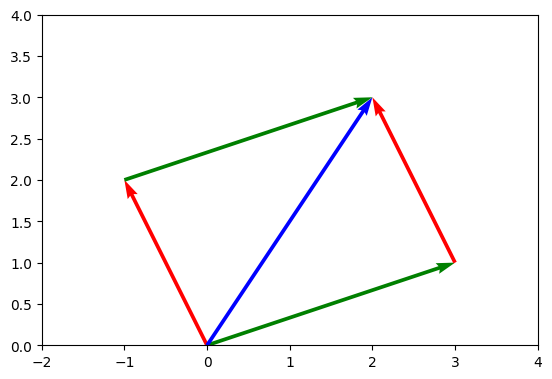

In [90]:
import matplotlib.pyplot as plt

o = np.array([0, 0]); # origin of the plane
v = np.array([-1, 2]);
w = np.array([3, 1]);

# express vectors as arrows
# using triples (starting point, endpoint, color)
arrows = [(o, v, 'r'),
          (o, w, 'g'),
          (o, v + w, 'b'),
          (v, w, 'g'),
          (w, v, 'r')]

# plot each arrow (triple) in the list of arrows using the function quiver
for p0, p1, c in arrows:
    plt.quiver(p0[0], p0[1], p1[0], p1[1], color=c, units='xy', scale=1)
plt.axis('scaled')
plt.xlim(-2, 4)
plt.ylim(0, 4)
plt.show()

### **Exercise 1**

An audio is a 1-d array of the amplitude of waveform over time. Here, we create two 1-second audios of note C and note G.

In [91]:
fs = 20000.  # 20 kHz sampling rate
duration = 1.  # second
t = np.arange(0., duration, 1 / fs)  # time points

# define a function Note which will also be used in Exercise 2
def Note(frequency, time):
    """Function to create the waveform of a note"""
    return np.sin(2 * np.pi * frequency * time)

def PlotWave(t, wave, duration=0.01):
    """Function to plot the waveform"""
    idx = t <= duration
    plt.figure(figsize=(3.6, 0.6))
    plt.plot(t[idx], wave[idx])
    plt.axis('off')
    plt.show()

Note C:


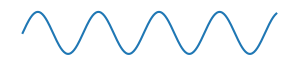

Note G:


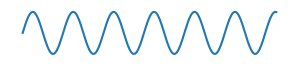

In [92]:
from IPython.display import Audio

freq_C = 261.6  # middle C (Hz)
freq_G = 391.995  # middle G (Hz)

# waveforms
note_C = Note(freq_C, t)
note_G = Note(freq_G, t)

# play sound
print('Note C:')
PlotWave(t, note_C, duration=0.016)
display(Audio(note_C, rate=fs))

print('Note G:')
PlotWave(t, note_G, duration=0.016)
display(Audio(note_G, rate=fs))

#### **Problem 1**

Create an array in the cell below for a chord composed by note C and G created above. And play the chord.

Chord 1:


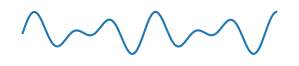

In [93]:

chord1 = note_C+note_G

print('Chord 1:')
PlotWave(t, chord1, duration=0.016)
display(Audio(chord1, rate=fs))

#### **Problem 2**

Create another chord in the cell below composed by note C with 2x amplitude and note G with 0.6x the amplitude.

Chord 2:


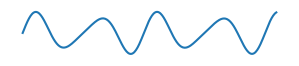

In [94]:
### Solution ###
chord2 = 2*note_C + 0.6*note_G

### Solution ###

# play sound
print('Chord 2:')
PlotWave(t, chord2, duration=0.016)
display(Audio(chord2, rate=fs))

### **Exercise 2**

Now consider the following real-life situation. Every time you click a key on a telephone touch pad, a unique tone will be generated. Each key is a combination of two pure tones, with frequencies given in the following table. For instance, when pressing 5, the telephone will generate a tone of 770 Hz and a tone of 1336 Hz.

$$\begin{array}{ |c|c|c|c| }
 \hline
 \text{Frequencies} & 1209 \text{ Hz} & 1336 \text{ Hz} & 1477 \text{ Hz} \\ \hline
 697 \text{ Hz} & 1 & 2 & 3 \\ \hline
 770 \text{ Hz} & 4 & 5 & 6 \\ \hline
 852 \text{ Hz} & 7 & 8 & 9 \\ \hline
 941 \text{ Hz} & * & 0 & \# \\ \hline
\end{array}$$

For example, to get the tone for key '6':

Tone for 6:


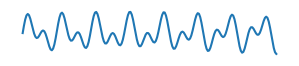

In [95]:
freq_row = np.array([697, 770, 852, 941])
freq_col = np.array([1209, 1336, 1477])

# play tone of key '6' given row and column index (1, 2)
tone_six = Note(freq_row[1], t) + Note(freq_col[2], t)
print('Tone for 6:')
PlotWave(t, tone_six)
display(Audio(tone_six, rate=fs))

#### **Set up the problem**



In [96]:
# create an array with the layout of the keys on the touch pad
touch_pad = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    ['*', 0, '#']
]).astype(str)
print(touch_pad)

# create a dictionary that maps a key on the touch pad to its corresponding two tone frequencies
dial_freq = {}
for i, f_row in enumerate(freq_row):
    for j, f_col in enumerate(freq_col):
        key = touch_pad[i, j]
        dial_freq[key] = [f_row, f_col]
display(dial_freq)

[['1' '2' '3']
 ['4' '5' '6']
 ['7' '8' '9']
 ['*' '0' '#']]


{np.str_('1'): [np.int64(697), np.int64(1209)],
 np.str_('2'): [np.int64(697), np.int64(1336)],
 np.str_('3'): [np.int64(697), np.int64(1477)],
 np.str_('4'): [np.int64(770), np.int64(1209)],
 np.str_('5'): [np.int64(770), np.int64(1336)],
 np.str_('6'): [np.int64(770), np.int64(1477)],
 np.str_('7'): [np.int64(852), np.int64(1209)],
 np.str_('8'): [np.int64(852), np.int64(1336)],
 np.str_('9'): [np.int64(852), np.int64(1477)],
 np.str_('*'): [np.int64(941), np.int64(1209)],
 np.str_('0'): [np.int64(941), np.int64(1336)],
 np.str_('#'): [np.int64(941), np.int64(1477)]}

#### **Problem**

Generate a dictionary `dial_tone` that maps each of all the keys on the touch pad to the corresponding waveform of its tone in the cell below, such that the next cell plays the correct tone for every key.

Tone for 6 from dial_tone dict:


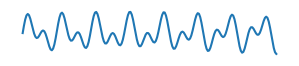

In [97]:
# make dictionary that maps each key to its waveform
dial_tone = {}
for key, (f_row, f_col) in dial_freq.items():
    dial_tone[key] = Note(f_row, t) + Note(f_col, t)

# check: play tone for key '6'
print("Tone for 6 from dial_tone dict:")
PlotWave(t, dial_tone['6'])
display(Audio(dial_tone['6'], rate=fs))



## **Solve Linear Systems**

A linear system can be intepreted as an augmented matrix $[A \mid b]$ where $A$ is the coeffient matrix and $b$ is the augment column. To solve such linear system, a standard method is to apply Gaussian elimination to this augmented matrix to get an echelon form or the reduced row echelon form.

### **Example 2**

Find the reduced row echelon form of a given augmented matrix, and solve the linear system associated to it.

In [98]:
import sympy as sp

# variables
x1, x2, x3, x4 = sp.symbols('x1 x2 x3 x4')

# augmented matrix
A = np.array(
    [[0, -3, -6, 4, 9],
    [-1, -2, -1, 3, 1],
    [-2, -3, 0, 3, -1],
    [1, 4, 5, -9, -7]]
)
A = sp.Matrix(A)  # convert to sympy.Matrix

# use method rref() to get reduced row echelon form and locate the pivit positions
# it returns a tuple, the first is the reduced row echelon form, and the second is a tuple of indices of the pivot columns
A_rref, pivots = A.rref()
display(A_rref)
display(pivots)

# solve the linear system with augmented matrix A
ans = sp.linsolve(A, [x1, x2, x3, x4])
display(ans)

Matrix([
[1, 0, -3, 0,  5],
[0, 1,  2, 0, -3],
[0, 0,  0, 1,  0],
[0, 0,  0, 0,  0]])

(0, 1, 3)

{(3*x3 + 5, -2*x3 - 3, x3, 0)}

### **Example 3**

We can also check linear (in)dependence by counting the number of pivots. In other words, Gaussian elimination provides a way to verify linear independence. To be precise, let $\{v_1,\cdots,v_n\}$ be a collection of vectors in $\mathbb{R}^m$. Consider the $m \times n$ matrix $V$ with columns given by $v_1,\cdots,v_n$, i.e.

$$V = \begin{pmatrix}
v_1 & v_2 & \cdots & v_n
\end{pmatrix}.$$

By finding the reduced row echelon form of $V$, if each of the columns of $V$ is pivot, then $\{v_1,\cdots,v_n\}$ is linearly independent; otherwise $\{v_1,\cdots,v_n\}$ is linearly dependent.

In [99]:
# continue above example
m, n = A.shape
linearly_independent = len(pivots) == n
print(linearly_independent) # False, columns of A not linearly independent

False


### **Exercise 3**

Do the following two problems.


#### **Problem 1**

Write a function with input a matrix $A$, return "True" if columns of $A$ are linearly independent, "False" if columns of $A$ are linearly dependent.

In [100]:
### Solution ###
def independent(A):
# convert to sympy.Matrix if not already
    A = sp.Matrix(A)
    _, pivots = A.rref()   # compute reduced row echelon form
    m, n = A.shape
    return len(pivots) == n
### Solution ###

#### **Problem 2**

Follow the setup below to estimate the probability of $5$ randomly chosen vectors with integer entries from -5 to 5 in $\mathbb{R}^{5}$ being **linearly dependent**, by repeating the procedure 10000 times. Make sure to use the function you wrote from Problem 1.

In [101]:
# get five such random column vectors in R^5
np.random.seed(3264)
v = np.random.randint(-5, 6, size=(5, 5))
print(v)

[[-2 -5  3  5  5]
 [ 3  0  1 -4 -4]
 [ 1  1 -2 -1 -4]
 [ 2 -5  2  5  1]
 [-2  4  5 -3  5]]


In [77]:
### Solution ###
np.random.seed(3264)
trials = 10000
count_dependent = 0

for _ in range(trials):
    # generate 5 random column vectors in R^5
    v = np.random.randint(-5, 6, size=(5, 5))  # 5x5 matrix
    if not independent(v):
        count_dependent += 1

prob_est = count_dependent / trials
print("Estimated probability of dependence:", prob_est)
### Solution ###

Estimated probability of dependence: 0.0014


## **Linear Transformations**

A map $f \colon \mathbb{R}^n \rightarrow \mathbb{R}^m$ is called a linear transformation if for any vectors $v, w \in \mathbb{R}^n$ and any scalar $\lambda \in \mathbb{R}$, it satisfies the following linearity conditions:

*  $f(v + w) = f(v) + f(w)$;
*  $f(\lambda v) = \lambda f(v)$.

An important fact is that each of such linear transformations can be represented by an $m \times n$ matrix $M$ such that the map is given by

$$f(v) = Mv,\quad \forall v \in \mathbb{R}^n.$$

We have seen several commonly used linear transformations $\mathbb{R}^2 \rightarrow \mathbb{R}^2$ in class. For instance, rotations, shear transformations, and reflections.

### **Example 4**

We start with the unit square in $\mathbb{R}^2$, with vertices $(0,0)$, $(1,0)$, $(1,1)$ and $(0,1)$. Plot the squares after the following linear transformations.

*   Shear transform along the positive $x$ axis by a factor of $2$, then
*   Rotate clockwisely by an angle of $\frac{\pi}{4}$.

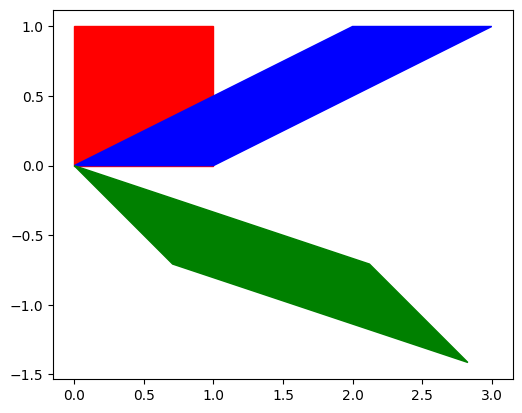

In [78]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import pi, sin, cos

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# shear transformation
S = np.array([[1, 2],
              [0, 1]])

# Rotation
t = -pi / 4
R = np.array([[cos(t), -sin(t)],
              [sin(t), cos(t)]])

# vertices of unit square
Q = [[0, 0],
     [1, 0],
     [1, 1],
     [0, 1]]

# after shear transfrom
sQ = [S.dot(q) for q in Q]

# then rotation
rsQ = [R.dot(q) for q in sQ]

ax.add_patch(patches.Polygon(Q, color='r', fill=True))
ax.add_patch(patches.Polygon(sQ, color='b', fill=True))
ax.add_patch(patches.Polygon(rsQ, color='g', fill=True))
plt.axis('scaled')
plt.show()

### **Exercise 3**

Given an image file. In the setup we do the followings:

*  Make it black and white;
*  Convert the grayscale image to a matrix by fixing graylevel for each pixel;
*  Visualize pixels stored in the matrix on the Euclidean plane.



#### **Set up the problem**

In [79]:
! git clone https://github.com/zhengninghu/m313LinearAlgebra_Python.git

import os
image_file = os.path.join('m313LinearAlgebra_Python', 'Assignment_1', 'otters.jpg')

fatal: destination path 'm313LinearAlgebra_Python' already exists and is not an empty directory.


True


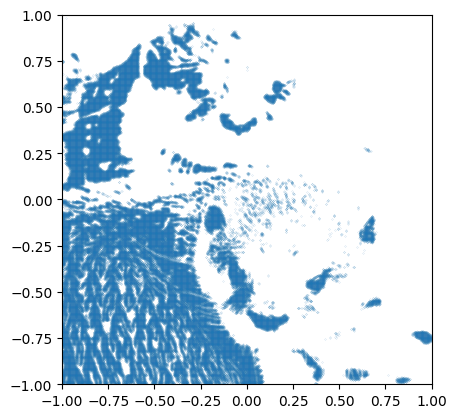

In [80]:
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

# load a picture to a matrix in grayscale
img = Image.open(image_file).convert('L')
A = np.array(img)
B = A < 100  # set up the threshold of the graylevel
m, n = B.shape
print(m == n) # squared

# scan the Boolean matrix B to create an array of pixels [i, j] with B[j, i] = True
P = np.array([[i, j] for j in range(m) for i in range(n) if B[j, i]])

# scale the picture to square and place it in the Euclidean plane with the center being the origin
# then, get the x, y coordinates of the pixels
x = -1 + 2 * P[:, 0] / (n - 1)
y = 1 - 2 * P[:, 1] / (m - 1)
sP = np.array([x, y]).T

# scatter plot the data with specified dot size 0.005
plt.scatter(x, y, s=0.005)
plt.axis('scaled')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

#### **Problem 4**

Rotate the pixels stored in `sP` counterclockwisely by an angle $\frac{\pi}{3}$ by defining the rotation matrix first. Then make a new array of points `rsP` after rotation, and plot the points on the coodinate plane.

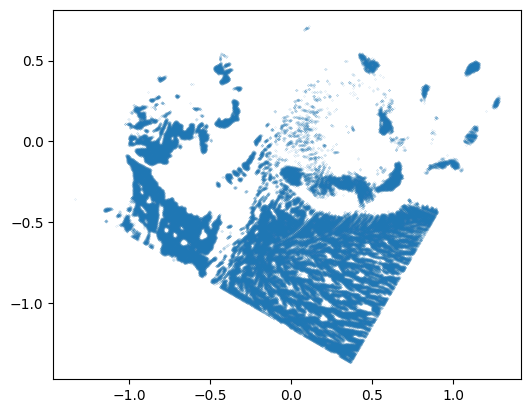

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import pi, sin, cos

# rotation by pi/3 counterclockwise
theta = pi / 3
R = np.array([[cos(theta), -sin(theta)],
              [sin(theta),  cos(theta)]])

# apply rotation to every pixel in sP
rsP = np.dot(sP, R.T)   # shape (num_pixels, 2)

# plotting
rx, ry = rsP.T
plt.scatter(rx, ry, s=0.005)
plt.axis('scaled')
plt.show()
